In [256]:
import numpy as np
import os
import glob
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [221]:
date="05092019" #defining the date for saving files later
wd= os.getcwd()

In [233]:
allyes=glob.glob("../data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
allno=glob.glob("../data/raw/no/"+'*.[pjJ][npP][gG]')
#can load with:
X=np.load("../data/processed/%s_X.npy"%(date))
y=np.load("../data/processed/%s_y.npy"%(date))

In [234]:
resX=[]
xres = 128
yres = 128
resizeval = (xres,yres)
# resize and convert to grayscale
for img in X:
    img = cv2.resize(img,resizeval)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_expanded = gray[:, :, np.newaxis]
    #print(img_expanded.shape)

#     print(gray.shape)
#     gray = img.reshape((len(gray), -1)).T
#     print(gray.shape)
    resX.append(img_expanded)

resX = np.array(resX)
#resX = resX.reshape((len(resX), -1)).T
#resX = resX.reshape(xres,yres, 1)

X = resX
#y = y.T
y = y.astype('float32')

In [237]:
X.shape

(253, 128, 128, 1)

In [238]:
y.shape

(253, 2)

In [239]:
from sklearn.model_selection import train_test_split
train_X0,test_X,train_label0,test_label = train_test_split(X, y, test_size=0.2, random_state=13)
train_X,valid_X,train_label,valid_label = train_test_split(train_X0, train_label0, test_size=0.2, random_state=13)

In [257]:
import keras
from keras.models import Sequential,Input,Model
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [144]:
batch_size = 64
epochs = 20
num_classes = 2

In [118]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(xres,yres,1),padding='same', kernel_regularizer=regularizers.l1_l2()))#changed to relu
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', kernel_regularizer=regularizers.l1_l2()))#changed to relu
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same', kernel_regularizer=regularizers.l1_l2()))#changed to relu
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2())) #changed to relu
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))


In [119]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu_87 (LeakyReLU)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_88 (LeakyReLU)   (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 13, 13, 128)       73856     
__________

In [121]:
train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 161 samples, validate on 41 samples
Epoch 1/20
161/161 [==============================] - 2s 14ms/step - loss: 149.9758 - acc: 0.6273 - val_loss: 131.1307 - val_acc: 0.5610
Epoch 2/20
161/161 [==============================] - 0s 287us/step - loss: 124.7196 - acc: 0.6460 - val_loss: 108.0489 - val_acc: 0.5610
Epoch 3/20
161/161 [==============================] - 0s 277us/step - loss: 102.4020 - acc: 0.6460 - val_loss: 87.8324 - val_acc: 0.5610
Epoch 4/20
161/161 [==============================] - 0s 274us/step - loss: 82.9192 - acc: 0.6460 - val_loss: 70.2971 - val_acc: 0.5610
Epoch 5/20
161/161 [==============================] - 0s 274us/step - loss: 66.1043 - acc: 0.6460 - val_loss: 55.4521 - val_acc: 0.5610
Epoch 6/20
161/161 [==============================] - 0s 274us/step - loss: 51.9547 - acc: 0.6460 - val_loss: 43.1526 - val_acc: 0.5610
Epoch 7/20
161/161 [==============================] - 0s 283us/step - loss: 40.3228 - acc: 0.6460 - val_loss: 33.3649 - val_acc: 0.5610

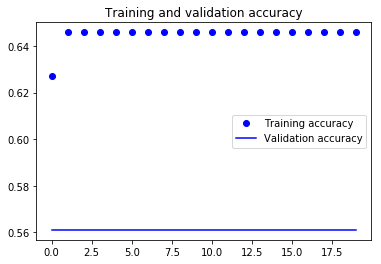

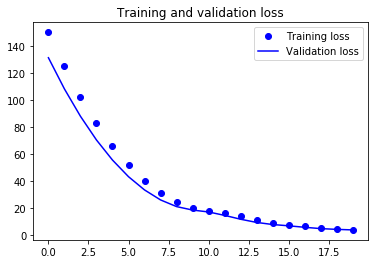

In [122]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [123]:
test_eval = model.evaluate(test_X, test_label, verbose=0)

In [124]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 3.8017495286230947
Test accuracy: 0.5490196119336521


# testing lower L1 terms

In [41]:
from sklearn.model_selection import train_test_split
train_X0,test_X,train_label0,test_label = train_test_split(X, y, test_size=0.2, random_state=13)
train_X,valid_X,train_label,valid_label = train_test_split(train_X0, train_label0, test_size=0.2, random_state=13)
batch_size = 64
epochs = 20
num_classes = 2

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(xres,yres,1),padding='same', kernel_regularizer=regularizers.l1(0.1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same', kernel_regularizer=regularizers.l1(0.1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same', kernel_regularizer=regularizers.l1(0.1)))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))


In [43]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
train1 = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 161 samples, validate on 41 samples
Epoch 1/20
161/161 [==============================] - 1s 5ms/step - loss: 290.2860 - acc: 0.6460 - val_loss: 270.8055 - val_acc: 0.5610
Epoch 2/20
161/161 [==============================] - 0s 262us/step - loss: 263.8355 - acc: 0.6460 - val_loss: 245.4100 - val_acc: 0.5610
Epoch 3/20
161/161 [==============================] - 0s 256us/step - loss: 238.8404 - acc: 0.6460 - val_loss: 221.5133 - val_acc: 0.5610
Epoch 4/20
161/161 [==============================] - 0s 240us/step - loss: 215.2987 - acc: 0.6460 - val_loss: 198.9474 - val_acc: 0.5610
Epoch 5/20
161/161 [==============================] - 0s 250us/step - loss: 193.0943 - acc: 0.6460 - val_loss: 177.7596 - val_acc: 0.5610
Epoch 6/20
161/161 [==============================] - 0s 296us/step - loss: 172.2953 - acc: 0.6460 - val_loss: 157.8972 - val_acc: 0.5854
Epoch 7/20
161/161 [==============================] - 0s 287us/step - loss: 152.7910 - acc: 0.6522 - val_loss: 139.3456 - val_acc

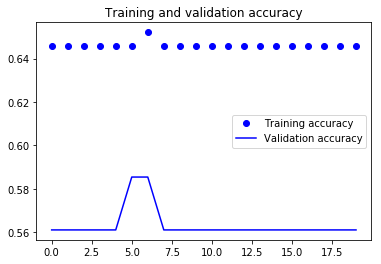

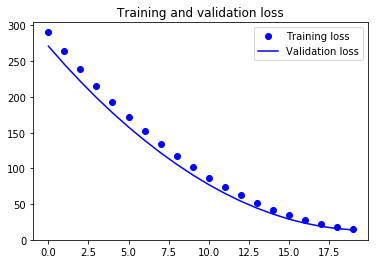

In [44]:
accuracy = train1.history['acc']
val_accuracy = train1.history['val_acc']
loss = train1.history['loss']
val_loss = train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
test_eval = model.evaluate(test_X, test_label, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 14.196929146261777
Test accuracy: 0.5490196119336521


# building a vgg16  network loaded like in lab 3-1

In [85]:
def build_model_vgg16_1(shape,n_cls): # functional model
    img_input = Input(shape=shape)
    # Block 1
    x = LeakyReLU(0.2)(Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input))
    x = LeakyReLU(0.2)(Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x))
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    x = BatchNormalization()(x)
    # Block 2
    x = LeakyReLU(0.2)(Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x))
    x = LeakyReLU(0.2)(Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x))
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    x = BatchNormalization()(x)
    # Block 3
    x = LeakyReLU(0.2)(Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x))
    x = LeakyReLU(0.2)(Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x))
    x = LeakyReLU(0.2)(Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x))
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    x = BatchNormalization()(x)
    # Block 4
    x = LeakyReLU(0.2)(Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x))
    x = LeakyReLU(0.2)(Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x))
    x = LeakyReLU(0.2)(Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x))
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    x = BatchNormalization()(x)
    # Block 5
    x = LeakyReLU(0.2)(Conv2D(512, (3, 3), padding='same', name='block5_conv1')(x))
    x = LeakyReLU(0.2)(Conv2D(512, (3, 3), padding='same', name='block5_conv2')(x))
    x = LeakyReLU(0.2)(Conv2D(512, (3, 3), padding='same', name='block5_conv3')(x))
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    x = BatchNormalization()(x)
    # output layer
    x = Flatten(name='flatten')(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(0.01,0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(n_cls, activation='softmax', name='predictions')(x)

    inputs = img_input
    model = Model(inputs, x, name='vgg16') 
    return model

def build_model_vgg16_2(shape,n_cls): # sequential model
    # build model 
    model = Sequential()
    # block 1 
    model.add(Conv2D(64, (3, 3), padding='same',input_shape=shape,activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    #model.add(Dropout(0.3))
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))   
    # block 2
    model.add(Conv2D(128, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(128, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    # block 3
    model.add(Conv2D(256, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(256, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(256, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    # block 4
    model.add(Conv2D(512, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(512, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Conv2D(512, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    # fc layer
    model.add(Flatten())
    model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    # output layer
    model.add(Dense(n_cls,activation='softmax'))
    return model  

In [86]:
model= build_model_vgg16_1(shape=(50,50,1), n_cls=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [88]:
from sklearn.model_selection import train_test_split
train_X0,test_X,train_label0,test_label = train_test_split(X, y, test_size=0.2, random_state=13)
train_X,valid_X,train_label,valid_label = train_test_split(train_X0, train_label0, test_size=0.2, random_state=13)
batch_size = 64
epochs = 20
num_classes = 2

In [89]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
train1 = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 161 samples, validate on 41 samples
Epoch 1/20
161/161 [==============================] - 6s 38ms/step - loss: 105.2279 - acc: 0.5031 - val_loss: 105.0358 - val_acc: 0.5854
Epoch 2/20
161/161 [==============================] - 0s 2ms/step - loss: 98.2604 - acc: 0.5404 - val_loss: 98.7879 - val_acc: 0.5854
Epoch 3/20
161/161 [==============================] - 0s 2ms/step - loss: 91.6395 - acc: 0.5776 - val_loss: 92.6444 - val_acc: 0.5854
Epoch 4/20
161/161 [==============================] - 0s 2ms/step - loss: 85.4888 - acc: 0.6522 - val_loss: 86.6773 - val_acc: 0.6098
Epoch 5/20
161/161 [==============================] - 0s 2ms/step - loss: 79.5938 - acc: 0.5901 - val_loss: 80.0027 - val_acc: 0.6098
Epoch 6/20
161/161 [==============================] - 0s 2ms/step - loss: 73.8638 - acc: 0.6025 - val_loss: 72.3436 - val_acc: 0.6341
Epoch 7/20
161/161 [==============================] - 0s 2ms/step - loss: 68.1814 - acc: 0.6398 - val_loss: 68.8360 - val_acc: 0.6098
Epoch 8/20
161

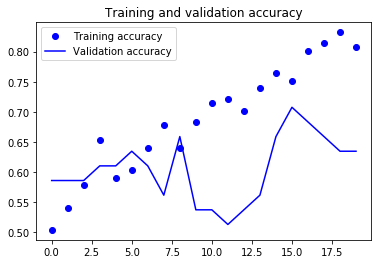

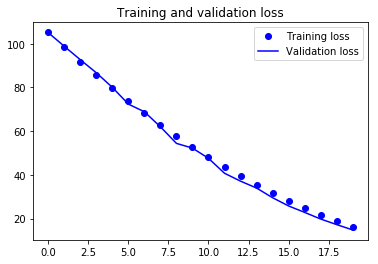

In [90]:
accuracy = train1.history['acc']
val_accuracy = train1.history['val_acc']
loss = train1.history['loss']
val_loss = train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [91]:
test_eval = model.evaluate(test_X, test_label, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 14.822578374077292
Test accuracy: 0.7058823435914283


In [78]:
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input
# import numpy as np

# model = VGG16(weights='imagenet', include_top=False)

# #img_path = 'elephant.jpg'
# #img = image.load_img(img_path, target_size=(224, 224))
# #x = image.img_to_array(img)
# #x = np.expand_dims(x, axis=0)
# #x = preprocess_input(x)

# train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

# #features = model.predict(x)

58892288/58889256 [==============================] - 6s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'elephant.jpg'

In [80]:
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
# train1 = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

ValueError: Error when checking input: expected input_1 to have shape (None, None, 3) but got array with shape (50, 50, 1)

In [ ]:
accuracy = train1.history['acc']
val_accuracy = train1.history['val_acc']
loss = train1.history['loss']
val_loss = train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_eval = model.evaluate(test_X, test_label, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# unet model from: https://www.kaggle.com/keegil/keras-u-net-starter-lb-0-277

In [142]:
from sklearn.model_selection import train_test_split
train_X0,test_X,train_label0,test_label = train_test_split(X, y, test_size=0.2, random_state=13)
train_X,valid_X,train_label,valid_label = train_test_split(train_X0, train_label0, test_size=0.2, random_state=13)

In [143]:
import keras
from keras.models import Sequential,Input,Model
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [144]:
batch_size = 64
epochs = 20
num_classes = 2

In [241]:
def unet(shape): # functional model
    from keras.layers.convolutional import Conv2D, Conv2DTranspose
    from keras.layers.merge import concatenate
    img_input = Input(shape=shape)


    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (img_input)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)
    
    outputs = Dense(2, activation='softmax', name='predictions')(c9)

    #outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    inputs = img_input
    model = Model(inputs, outputs, name='unet') 
    return model

In [259]:
from keras.models import *
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.merge import concatenate

In [266]:
def unet(shape): # functional model
    from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D
    from keras.callbacks import ModelCheckpoint, LearningRateScheduler
    from keras import backend as keras
    
    from keras.layers.convolutional import Conv2D, Conv2DTranspose
    from keras.layers.merge import concatenate
    
    inputs = Input(shape=shape)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    #model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [300]:
def unet(pretrained_weights = None,input_size = (128,128,1), n_cls=2):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    ###GE ADDED end####
        # output layer
    x = Flatten(name='flatten')(conv9)
#     x = Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(0.01,0.01))(x)
#     x = Dropout(0.5)(x)
#     x = Dense(n_cls, activation='softmax', name='predictions')(x)
    ###GE ADDED end####    
    #conv10 = Conv2D(1, 1, activation = 'sigmoid')(x)
    output = Dense(n_cls, activation='softmax', name='predictions')(x) #added

    model = Model(input = inputs, output = output)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [288]:
Input(X.shape)

<tf.Tensor 'input_25:0' shape=(?, 253, 128, 128, 1) dtype=float32>

In [301]:
model= unet()

C:\Users\garrett\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


In [302]:
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
#model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
train1 = model.fit(train_X, train_label, epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 161 samples, validate on 41 samples
Epoch 1/20
161/161 [==============================] - 31s 191ms/step - loss: 0.7115 - acc: 0.5901 - val_loss: 0.6893 - val_acc: 0.4634
Epoch 2/20
161/161 [==============================] - 5s 34ms/step - loss: 0.6858 - acc: 0.6149 - val_loss: 0.6824 - val_acc: 0.5610
Epoch 3/20
161/161 [==============================] - 5s 32ms/step - loss: 0.6615 - acc: 0.6460 - val_loss: 0.6765 - val_acc: 0.5610
Epoch 4/20
161/161 [==============================] - 5s 31ms/step - loss: 0.6896 - acc: 0.6460 - val_loss: 0.6803 - val_acc: 0.5610
Epoch 5/20
161/161 [==============================] - 5s 34ms/step - loss: 0.6780 - acc: 0.6460 - val_loss: 0.6850 - val_acc: 0.5610
Epoch 6/20
161/161 [==============================] - 6s 37ms/step - loss: 0.6736 - acc: 0.6460 - val_loss: 0.6798 - val_acc: 0.5610
Epoch 7/20
161/161 [==============================] - 5s 33ms/step - loss: 0.6629 - acc: 0.6460 - val_loss: 0.6723 - val_acc: 0.5610
Epoch 8/20
161/161 [==

In [ ]:
accuracy = train1.history['acc']
val_accuracy = train1.history['val_acc']
loss = train1.history['loss']
val_loss = train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_eval = model.evaluate(test_X, test_label, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])